# 16. Регуляризация А.Н. Тихонова
Система $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ называется *регуляризованной* по отношению к системе
$Ax = b$. Параметр $\alpha$ называется *параметром регуляризации*. 
*Метод регуляризации* А.Н.Тихонова заключается в выборе
последовательности $\alpha_k \to 0$ (например, геометрической прогрессии) 
и решении регуляризованных систем
$(A^{\rm T}A + \alpha_k E)x = A^{\rm T} b$  для конечного числа
значений $\alpha_k$, и выборе из всех полученных решений того, при котором
норма невязки для исходной системы минимальна.

# Написать функцию 
```
    x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha),
```
в которой `A` и `b` – матрица и левая часть исходной системы,
`alpha` – вектор, содержащий набор параметров регуляризации,
`x` – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения 
параметра регуляризации, `discr` – вектор полученных таким образом невязок, `x0` – регуляризованное решение
(из найденных) с минимальной нормой невязки, `discr0`, `alpha0` – соответствующие ему
значения нормы невязки и параметра регуляризации.



# Решение
Напишем функцию, которая будет принимать:

*   A - матрица
*   b - левая часть исходной системы
*   alpha - вектор, содержащий набор параметров регуляризации 
 
и выдавать: 


*   x – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения параметра регуляризации

*   discr – вектор полученных таким образом невязок
*   discr0, alpha0 – соответствующие ему значения нормы невязки и параметра регуляризации.










 

## Начальные данные:


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from scipy import linalg
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Главная Функция

In [0]:
def TIKHONOVREGULASATION (A, b, alpha):
    x = []
    discr = []
    AstepenT = np.transpose(A)
    for k in range(len(alpha)):
        Xx = linalg.solve((AstepenT@A + alpha[k]), (AstepenT @ b))
        x.append(Xx)
        discr_c = linalg.norm(A@Xx - b)/linalg.norm(b)
        discr.append(discr_c)
    discr0 = discr[0]
    _l = 0
    for l in range(len(discr)):
        if discr[l] < discr0:
            _l = l
            discr0 = discr[l]
    alpha0 = alpha[_l]
    x0 = x[_l]
    return (x0, discr0, alpha0, x, discr)


**Функция графика:**

In [0]:
def make_plt(_vector, _discr0, func = '.', title = '--- Порядок матрицы и Норма невязки - сравнение и зависимость ---'):
  plt.figure(figsize=(10,5))    
  plt.semilogy(_vector, _discr0,func)

  plt.title(title)
  plt.xlabel('Порядок матрицы')
  plt.ylabel('Норма невязки')
  plt.show()
  #pass

# Приступим к решению задачи регулизации 
 
 Система $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$  называется регуляризованной по отношению к системе  $Ax = b$ . 

Начнём --- посмотрим на значения невязок у каждой системы

In [0]:
_discr0 = []
_vector = np.arange(10, 450, 5)

for i in _vector:
    A = np.random.uniform(-100, 100, (i, i))
    b = np.random.uniform(-100, 100, i)
    x = linalg.solve(A, b)
    dr = linalg.norm(A@x - b)/linalg.norm(b)
    _discr0.append(dr)

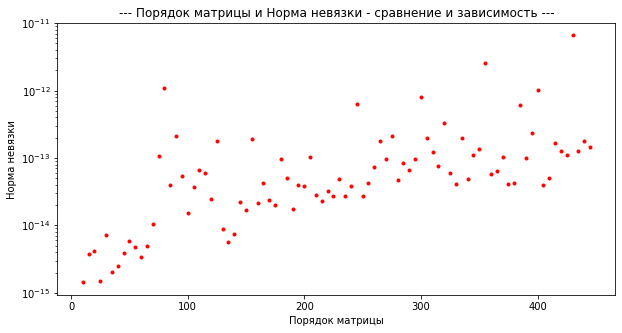

In [0]:
make_plt(_vector, _discr0, '.r')

***Обычная система: значение невязки возрастает при увеличении порядка у матрицы***

In [0]:
_vector = np.arange(10, 450, 5)
_alpha0 = []
_discr0 = []
for i in _vector:
    A = np.random.uniform(-100, 100, (i, i))
    b = np.random.uniform(-100, 100, i)
    alpha = np.linspace(0.0002 * i, 0.0002, i)
    #t = tikhonov(A, b, alpha)
    t = TIKHONOVREGULASATION(A, b, alpha)
    _alpha0.append(t[2])
    _discr0.append(t[1])

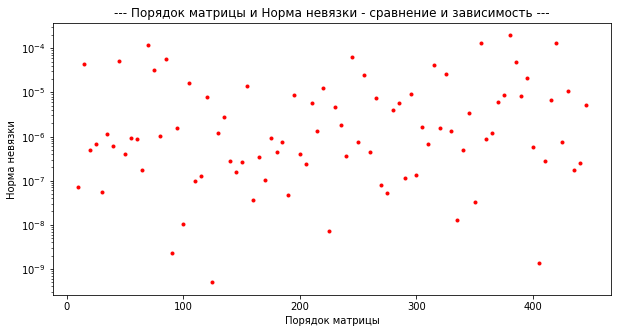

In [0]:
make_plt(_vector, _discr0, '.r')

pass

***Регуляризованная: у невязки значения получаются повыше, чем в в обычной системе***





# Перейдём к проверке плохообусловленных матриц из задания №8

***Функция***

In [0]:
def MatrixAwful(n):
    Q = np.random.uniform(-100, 100, (n, n))
    W = np.tril(Q)
    Q = np.random.uniform(-100, 100, (n, n))
    U = np.triu(Q)
    return W@U

In [0]:
__vector = np.arange(10, 450, 5)
_discr0 = []
for i in __vector:
    #A = badMatrix(i)
    A = MatrixAwful(i)
    b = np.random.uniform(-100, 100, i)
    x = linalg.solve(A, b)
    dr = linalg.norm(A@x - b)/linalg.norm(b)
    _discr0.append(dr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: LinAlgWarning: Ill-conditioned matrix (rcond=3.32821e-18): result may not be accurate.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: LinAlgWarning: Ill-conditioned matrix (rcond=3.6894e-19): result may not be accurate.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: LinAlgWarning: Ill-conditioned matrix (rcond=1.92449e-20): result may not be accurate.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: LinAlgWarning: Ill-conditioned matrix (rcond=2.54558e-19): result may not be accurate.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: LinAlgWarning: Ill-conditioned matrix (rcond=5.40975e-20): result may not be accurate.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: LinAlgWarning: Ill-conditioned matrix (rcond=1.81593e-19): result may not be accurate.
  import sys
/usr/local/lib/py

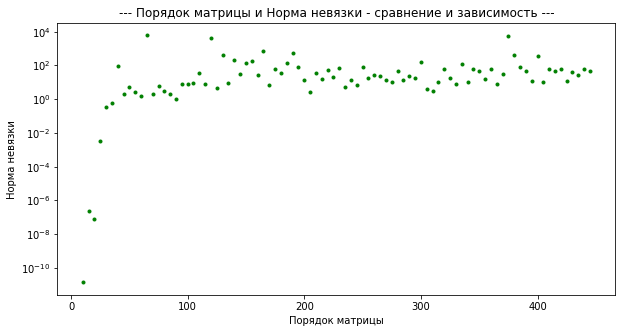

In [0]:
make_plt(_vector, _discr0, '.g')

pass


***Плохообусловленная матрица - обычная система: значение невязки повыше, чем у обычной матрицы. ***

alpha = np.linspace(0.0002 * i * n, 0.0002  * n, i), n =  1


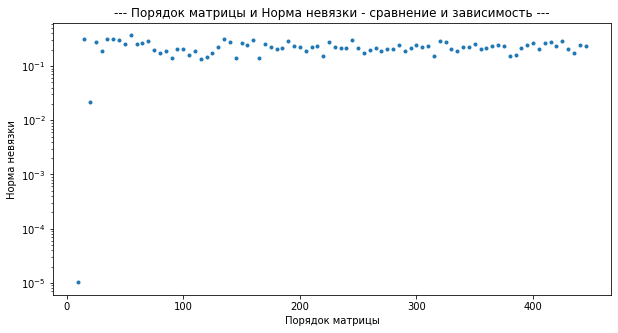

alpha = np.linspace(0.0002 * i * n, 0.0002  * n, i), n =  2


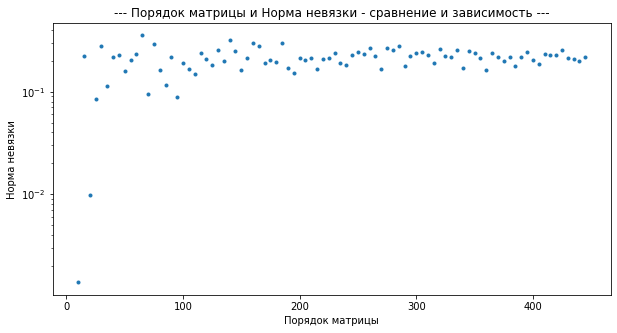

alpha = np.linspace(0.0002 * i * n, 0.0002  * n, i), n =  3


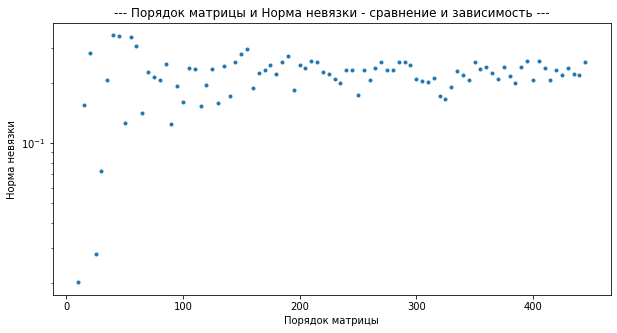

alpha = np.linspace(0.0002 * i * n, 0.0002  * n, i), n =  4


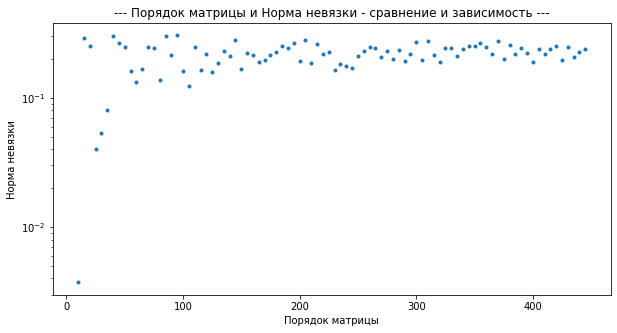

In [0]:
_vector = np.arange(10, 450, 5)
_n = 5 #число векторов alpha, считается долго, лучше брать немного чисел
for n in range(1, _n):
  _alpha0 = []
  _discr0 = []
  for i in _vector:
    A = MatrixAwful(i)
    b = np.random.uniform(-100, 100, i)
    alpha = np.linspace(0.0002 * i * n, 0.0002  * n, i)
    t = TIKHONOVREGULASATION(A, b, alpha)
    _alpha0.append(t[2])
    _discr0.append(t[1])
  print('alpha = np.linspace(0.0002 * i * n, 0.0002  * n, i), n = ', n)
  make_plt(_vector, _discr0, '.')
  discr0.append(_discr0)

In [0]:
for n, discr0 in enumerate(_discr00):
  print('alpha = np.linspace(0.0002 * i * n, 0.0002  * n, i), n = ', n+1)
  #make_plt(_vector, discr0[88*n:88*(n+1)-1], '.')
  


alpha = np.linspace(0.0002 * i * n, 0.0002  * n, i), n =  1
alpha = np.linspace(0.0002 * i * n, 0.0002  * n, i), n =  2


***Плохообусловленная матрица - регуляризованная система: значение невязки повыше,чем у обычный матрицы с регуляризованной системой***

# Итог:
Если применять регуляризованную систему с обычными матрицами, то значения невязок получаются гораздо выше, чем с плохообусловленными матрицами. Получается, с плохообусловленными матрицами всё в среднем наоборот, значение невязок ниже.